# Enjal Chauhan 
## Advanced Big Data and Data Mining (MSCS-634-M20)
## Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis

In [65]:
pwd

'/Users/enjalchauhan/MSCS_634_Lab_1'

In [ ]:
mkdir data

mkdir: data: File exists


In [7]:
mv dirty_cafe_sales.csv data\

In [9]:
mkdir screenshots

In [98]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv("data/dirty_cafe_sales.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [68]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Transaction ID    10000 non-null  str  
 1   Item              9667 non-null   str  
 2   Quantity          9862 non-null   str  
 3   Price Per Unit    9821 non-null   str  
 4   Total Spent       9827 non-null   str  
 5   Payment Method    7421 non-null   str  
 6   Location          6735 non-null   str  
 7   Transaction Date  9841 non-null   str  
dtypes: str(8)
memory usage: 625.1 KB


In [69]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


**Changed the data types of few columns to work with numeric datas for scatter plots.**

In [70]:
df.dtypes

Transaction ID      str
Item                str
Quantity            str
Price Per Unit      str
Total Spent         str
Payment Method      str
Location            str
Transaction Date    str
dtype: object

In [71]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [72]:
df.dtypes

Transaction ID          str
Item                    str
Quantity            float64
Price Per Unit      float64
Total Spent         float64
Payment Method          str
Location                str
Transaction Date        str
dtype: object

<Axes: title={'center': 'Quantity vs Total Spent'}, xlabel='Quantity', ylabel='Total Spent'>

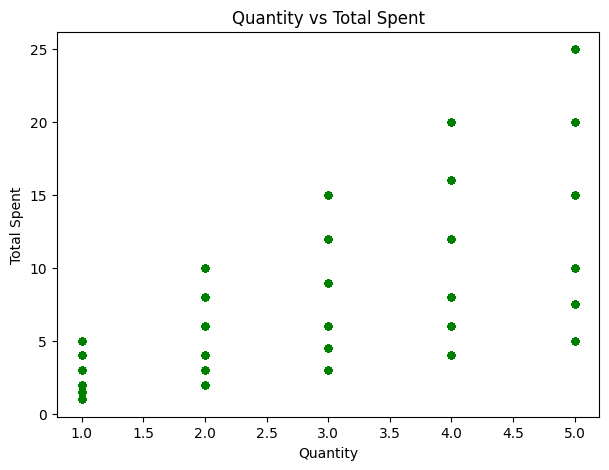

In [73]:
df.plot(x='Quantity', y='Total Spent', kind='scatter', figsize=(7,5), color='green', title='Quantity vs Total Spent')

**Scatter Plot (Quantity vs Total Spent)**  
   The scatter plot between the Quantity and Total Spent shows a positive correlation meaning that as quantity increases, total spending increases.

In [74]:
import matplotlib.pyplot as plt

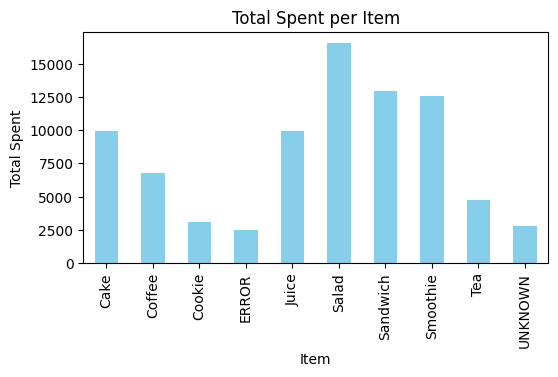

In [75]:
df.groupby('Item')['Total Spent'].sum().plot(
    kind='bar', 
    figsize=(6,3), 
    color='skyblue', 
    title='Total Spent per Item'
)
plt.ylabel('Total Spent')
plt.xlabel('Item')
plt.show()

**Bar Chart (Total Spent per Item)**  
   The bar chart shows which items generate the most revenue calculated based on quantities sold and total spent for every item category. From the above bar chart, it is visible that item Salad had the highest total spending, while Item 'ERROR' had the lowest. Here, the error meaning the item category is empty(or null).

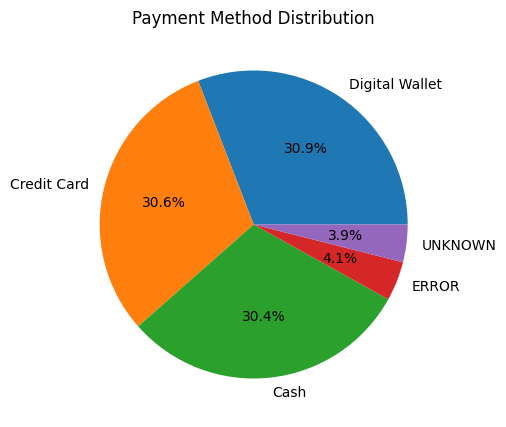

In [76]:
df['Payment Method'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(5,5), 
    title='Payment Method Distribution'
)
plt.ylabel('')  #Remove the default y-label for pie chart
plt.show()

**Pie Chart (Payment Method Distribution)**  
   The pie chart shows that most transactions were made by digital wallet (30.9)%, followed by credit card (30.6%) and cash (30.4%). This shows majority of people nowadays carry less cash and more inclined to digital payment. Also, the error portion marks that some payment option in the dataset is null.

In [77]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3.0,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [78]:
df.isnull()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,True,False,False
9996,False,True,False,True,False,False,True,False
9997,False,False,False,False,False,False,True,False
9998,False,False,False,True,False,False,True,False


In [79]:
for col in df.columns:
    missingValue = df[col].isnull().sum()
    print("{} has {} missing value(s)".format(col,missingValue))

Transaction ID has 0 missing value(s)
Item has 333 missing value(s)
Quantity has 479 missing value(s)
Price Per Unit has 533 missing value(s)
Total Spent has 502 missing value(s)
Payment Method has 2579 missing value(s)
Location has 3265 missing value(s)
Transaction Date has 159 missing value(s)


In [80]:
df2 = df.dropna(axis = 0)
df2

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
6,TXN_4433211,UNKNOWN,3.0,3.0,9.0,ERROR,Takeaway,2023-10-06
...,...,...,...,...,...,...,...,...
9979,TXN_9933628,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-07-20
9986,TXN_2858441,Sandwich,2.0,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3.0,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4.0,4.0,16.0,UNKNOWN,In-store,2023-07-05


In [81]:
df2 = df.dropna(thresh = 7)
df2

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9991,TXN_3897619,Sandwich,3.0,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4.0,4.0,16.0,UNKNOWN,In-store,2023-07-05
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,UNKNOWN,2023-08-30
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02


In [82]:
# For numeric columns: forward fill and backward fill
df['Quantity'] = df['Quantity'].ffill().bfill()
df['Price Per Unit'] = df['Price Per Unit'].ffill().bfill()
df['Total Spent'] = df['Total Spent'].ffill().bfill()

# For categorical columns: fill with 'Unknown'
df['Item'] = df['Item'].fillna('Unknown')
df['Payment Method'] = df['Payment Method'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')

# fill Transaction Date missing with 'Unknown' or drop
df['Transaction Date'] = df['Transaction Date'].fillna('Unknown')

df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [83]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,12.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Unknown,UNKNOWN,2023-08-30
9996,TXN_9659401,Unknown,3.0,2.0,3.0,Digital Wallet,Unknown,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02
9998,TXN_7695629,Cookie,3.0,2.0,3.0,Digital Wallet,Unknown,2023-12-02


In [84]:
df.shape

(10000, 8)

<Axes: >

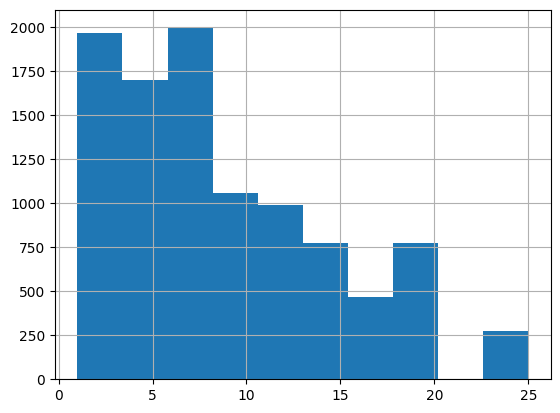

In [85]:
df['Total Spent'].hist()

In [86]:
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 8.0


In [87]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [88]:
# Detect outliers
outliers = df[(df['Total Spent'] < lower_bound) | (df['Total Spent'] > upper_bound)]
print("Outliers:\n", outliers)

# Remove outliers
df_no_outliers = df[~((df['Total Spent'] < lower_bound) | (df['Total Spent'] > upper_bound))]

Outliers:
      Transaction ID     Item  Quantity  Price Per Unit  Total Spent  \
10      TXN_2548360    Salad       5.0             5.0         25.0   
51      TXN_6342161    Salad       5.0             5.0         25.0   
52      TXN_8914892  UNKNOWN       5.0             5.0         25.0   
96      TXN_5220895    Salad       5.0             5.0         25.0   
100     TXN_9517146  Unknown       5.0             5.0         25.0   
...             ...      ...       ...             ...          ...   
9791    TXN_1232346    Salad       5.0             5.0         25.0   
9805    TXN_9506076    Salad       5.0             5.0         25.0   
9879    TXN_6393305    Salad       5.0             5.0         25.0   
9908    TXN_8922585    Salad       5.0             5.0         25.0   
9971    TXN_6120851    Salad       5.0             5.0         25.0   

      Payment Method  Location Transaction Date  
10              Cash  Takeaway       2023-11-07  
51             ERROR  Takeaway      

<Axes: >

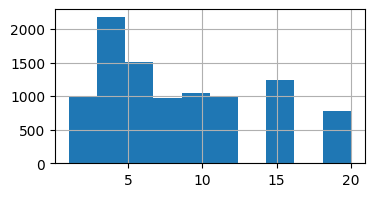

In [89]:
df_no_outliers['Total Spent'].hist(figsize = (4,2))

{'whiskers': [<matplotlib.lines.Line2D at 0x117695810>,
 'caps': [<matplotlib.lines.Line2D at 0x117695a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1176956d0>],
 'medians': [<matplotlib.lines.Line2D at 0x117695d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x117695e50>],
 'means': []}

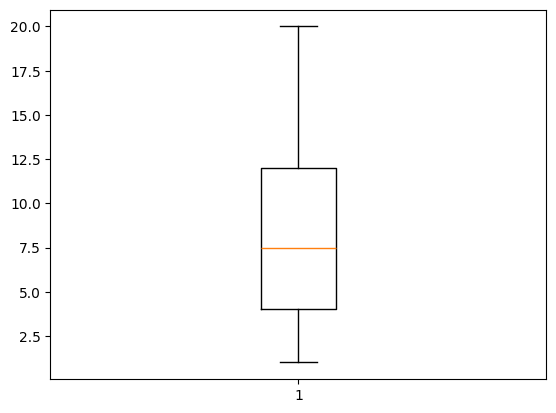

In [90]:
plt.boxplot(df_no_outliers['Total Spent'])

In [91]:
df_no_outliers.info()

<class 'pandas.DataFrame'>
Index: 9728 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9728 non-null   str    
 1   Item              9728 non-null   str    
 2   Quantity          9728 non-null   float64
 3   Price Per Unit    9728 non-null   float64
 4   Total Spent       9728 non-null   float64
 5   Payment Method    9728 non-null   str    
 6   Location          9728 non-null   str    
 7   Transaction Date  9728 non-null   str    
dtypes: float64(3), str(5)
memory usage: 684.0 KB


In [92]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,12.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Unknown,UNKNOWN,2023-08-30
9996,TXN_9659401,Unknown,3.0,2.0,3.0,Digital Wallet,Unknown,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02
9998,TXN_7695629,Cookie,3.0,2.0,3.0,Digital Wallet,Unknown,2023-12-02


In [93]:
# Sampling 50% of the data
df_sample = df.sample(frac=0.5, random_state=42)

# Dropping less relevant columns (Assuming Transaction Date for now)
df_sample = df_sample.drop(columns=['Transaction Date'])

df_sample

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location
6252,TXN_2919952,Juice,1.0,3.0,15.0,Digital Wallet,In-store
4684,TXN_4265056,Juice,1.0,3.0,3.0,Cash,Unknown
1731,TXN_2463115,Sandwich,5.0,4.0,20.0,Credit Card,Takeaway
4742,TXN_7619641,Juice,3.0,3.0,9.0,Unknown,In-store
4521,TXN_9566593,Cake,2.0,3.0,6.0,Digital Wallet,Unknown
...,...,...,...,...,...,...,...
5743,TXN_6476204,UNKNOWN,5.0,4.0,15.0,Unknown,Takeaway
6226,TXN_2696377,Juice,4.0,3.0,12.0,Digital Wallet,In-store
1973,TXN_1270603,Juice,4.0,3.0,12.0,Credit Card,Takeaway
336,TXN_5634135,Cookie,2.0,4.0,2.0,Unknown,ERROR


In [94]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,12.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Unknown,UNKNOWN,2023-08-30
9996,TXN_9659401,Unknown,3.0,2.0,3.0,Digital Wallet,Unknown,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02
9998,TXN_7695629,Cookie,3.0,2.0,3.0,Digital Wallet,Unknown,2023-12-02


In [95]:
df['Total Spent MinMax'] = (df['Total Spent'] - df['Total Spent'].min())/ (df['Total Spent'].max() - df['Total Spent'].min())
df['Total Spent MinMax'].describe()

count    10000.000000
mean         0.329665
std          0.249885
min          0.000000
25%          0.125000
50%          0.291667
75%          0.458333
max          1.000000
Name: Total Spent MinMax, dtype: float64

In [96]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Total Spent MinMax
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,0.125000
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0.458333
2,TXN_4271903,Cookie,4.0,1.0,12.0,Credit Card,In-store,2023-07-19,0.458333
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,0.375000
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,0.125000
...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Unknown,UNKNOWN,2023-08-30,0.125000
9996,TXN_9659401,Unknown,3.0,2.0,3.0,Digital Wallet,Unknown,2023-06-02,0.083333
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02,0.291667
9998,TXN_7695629,Cookie,3.0,2.0,3.0,Digital Wallet,Unknown,2023-12-02,0.083333


In [100]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      10000 non-null  str    
 1   Item                10000 non-null  str    
 2   Quantity            10000 non-null  float64
 3   Price Per Unit      10000 non-null  float64
 4   Total Spent         10000 non-null  float64
 5   Payment Method      10000 non-null  str    
 6   Location            10000 non-null  str    
 7   Transaction Date    10000 non-null  str    
 8   Total Spent MinMax  10000 non-null  float64
dtypes: float64(4), str(5)
memory usage: 703.3 KB


In [101]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Total Spent MinMax
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.029200,2.95090,8.911950,0.329665
std,1.417374,1.27922,5.997234,0.249885
min,1.000000,1.00000,1.000000,0.000000
25%,2.000000,2.00000,4.000000,0.125000
50%,3.000000,3.00000,8.000000,0.291667
75%,4.000000,4.00000,12.000000,0.458333
max,5.000000,5.00000,25.000000,1.000000


In [102]:
def getCentralTendency(col):
    min = df[col].min()
    max = df[col].max()
    median = df[col].median()
    mode = df[col].mode()[0]
    midrange = (max - min)/2
    print('col:',col, 
      '\n\tmin:', min, 
      'max:',max, 
      'median:', median, 
      'mode:', mode, 
      'midrange:', midrange)

numericalcols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numericalcols:
    getCentralTendency(col)

col: Quantity 
	min: 1.0 max: 5.0 median: 3.0 mode: 5.0 midrange: 2.0
col: Price Per Unit 
	min: 1.0 max: 5.0 median: 3.0 mode: 3.0 midrange: 2.0
col: Total Spent 
	min: 1.0 max: 25.0 median: 8.0 mode: 6.0 midrange: 12.0


In [103]:
def getDispersion(col):
    range = df[col].max() - df[col].min()
    quantiles = df[col].quantile([0.25, 0.5, 0.75])
    IQR = quantiles[0.75] - quantiles[0.25]
    var = df[col].var()
    std = df[col].std()
    print('col:',col, 
      '\n\trange:', range, 
      'Q1:',quantiles[0.25], 
      'Q2:', quantiles[0.5], 
      'Q3:', quantiles[0.75], 
      'IQR:', IQR,
      'var:', var,
      'std:', std)
numericalcols = ['Quantity', 'Price Per Unit', 'Total Spent']

for col in numericalcols:
    getDispersion(col)

col: Quantity 
	range: 4.0 Q1: 2.0 Q2: 3.0 Q3: 4.0 IQR: 2.0 var: 2.0089482548254827 std: 1.4173737174173517
col: Price Per Unit 
	range: 4.0 Q1: 2.0 Q2: 3.0 Q3: 4.0 IQR: 2.0 var: 1.6364028302830285 std: 1.2792196176900308
col: Total Spent 
	range: 24.0 Q1: 4.0 Q2: 8.0 Q3: 12.0 IQR: 8.0 var: 35.96681887938794 std: 5.9972342691767455


In [104]:
df[numericalcols].corr()

,Quantity,Price Per Unit,Total Spent
Quantity,1.000000,0.004817,0.643907
Price Per Unit,0.004817,1.000000,0.579868
Total Spent,0.643907,0.579868,1.000000


In [108]:
df['popular'] = np.select(
    [df['Total Spent'] < 8, df['Total Spent'] >= 8],
    ['not popular', 'popular'],
    default='unknown')
df['popular']

0       not popular
1           popular
2           popular
3           popular
4       not popular
           ...     
9995    not popular
9996    not popular
9997        popular
9998    not popular
9999        popular
Name: popular, Length: 10000, dtype: str